# Comparing by Course

## Import Packages

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [2]:
'''
Selecting course name:
   - gestion-organizaciones-efectivas
   - explorando-energia-sustentable
   - camino-excelencia-gestion-proyectos
   - gestion-empresarial-pyme
   - aprendiendo-programar-python
   - analisis-sistemas-de-transporte
   - electrones-en-accion
   - web-semantica
   - aula-constructivista
   - liderazgo-educativo
'''
course_names = ['gestion-organizaciones-efectivas', 
                 'explorando-energia-sustentable',
                 'camino-excelencia-gestion-proyectos',
                 'gestion-empresarial-pyme',
                 'aprendiendo-programar-python',
                 'analisis-sistemas-de-transporte',
                 'electrones-en-accion',
                 'web-semantica',
                 'aula-constructivista',
                 'liderazgo-educativo']

In [3]:
# Users
df_users = {}
for course_name in course_names:
    df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/users.csv', index_col='user_id')
    df_users[course_name] = df
    
# Notes
df_notes = {}
for course_name in course_names:
    df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/notes_by_user.csv', index_col='user_id')
    df_notes[course_name] = df
    
# Goals
df_goals_users = {}
for course_name in course_names:
    df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/goals_by_user.csv', index_col='user_id')
    df_goals_users[course_name] = df
    
# Events
df_interactions = {}
for course_name in course_names:
    df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/interactions.csv', index_col='user_id')
    df_interactions[course_name] = df
    
df_types = {}
for course_name in course_names:
    if course_name != 'liderazgo-educativo':
        df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/interactions_types.csv', index_col='user_id')
        df_types[course_name] = df
        
df_graphs = {}
for course_name in course_names:
    if course_name != 'liderazgo-educativo':
        df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/graphs_by_users.csv', index_col='user_id')
        df_graphs[course_name] = df
        
df_buttons = {}
for course_name in course_names:
    if course_name != 'liderazgo-educativo':
        df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/buttons_by_users.csv', index_col='user_id')
        df_buttons[course_name] = df
        
df_menus = {}
for course_name in course_names:
    if course_name != 'liderazgo-educativo':
        df = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/menus_by_users.csv', index_col='user_id')
        df_menus[course_name] = df

## Data Analysis and Visualizations

### Gender

In [4]:
df_edited = []
for j in df_users:
    df_edited.append((df_users[j].gender.value_counts(normalize=True) * 100).rename(j))

In [5]:
df = ((pd.concat(df_edited, axis=1, sort=True))).round(2)

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0})

In [6]:
df

,gestion-organizaciones-efectivas,explorando-energia-sustentable,camino-excelencia-gestion-proyectos,gestion-empresarial-pyme,aprendiendo-programar-python,analisis-sistemas-de-transporte,electrones-en-accion,web-semantica,aula-constructivista,liderazgo-educativo
Female,38.24,0.0,38.61,38.46,26.03,0.0,7.69,42.86,60.0,0.0
Male,61.76,100.0,61.39,61.54,73.97,100.0,92.31,57.14,40.0,100.0


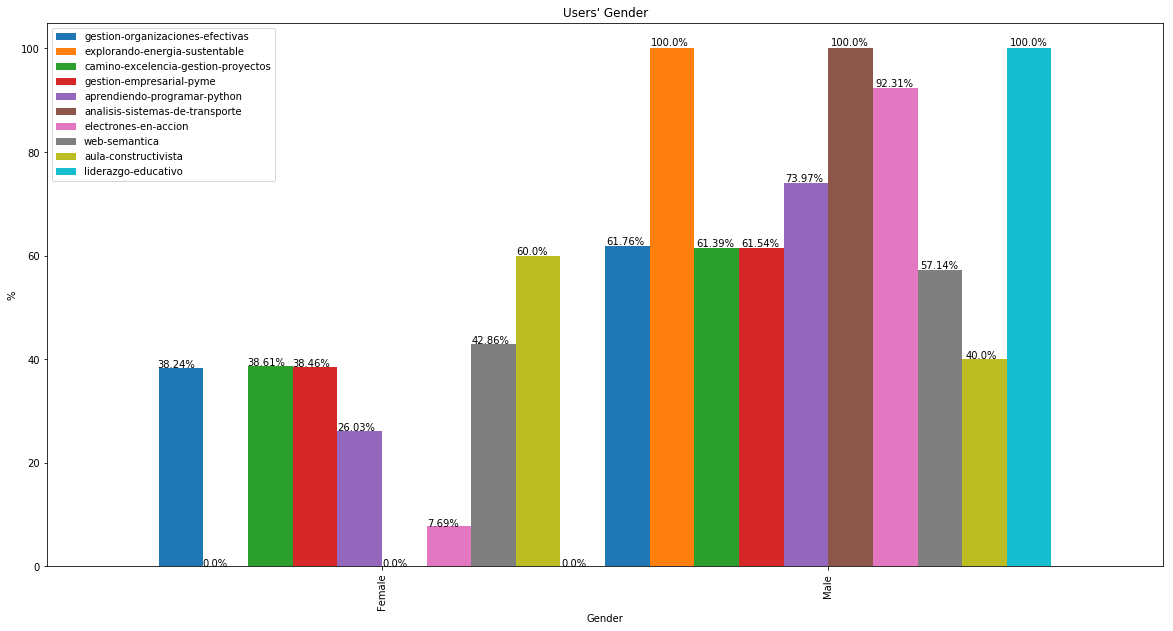

In [7]:
ax = df.plot(kind='bar', figsize=(20,10), title="Users' Gender", width=1)
ax.set_xlabel("Gender")
ax.set_ylabel("%")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

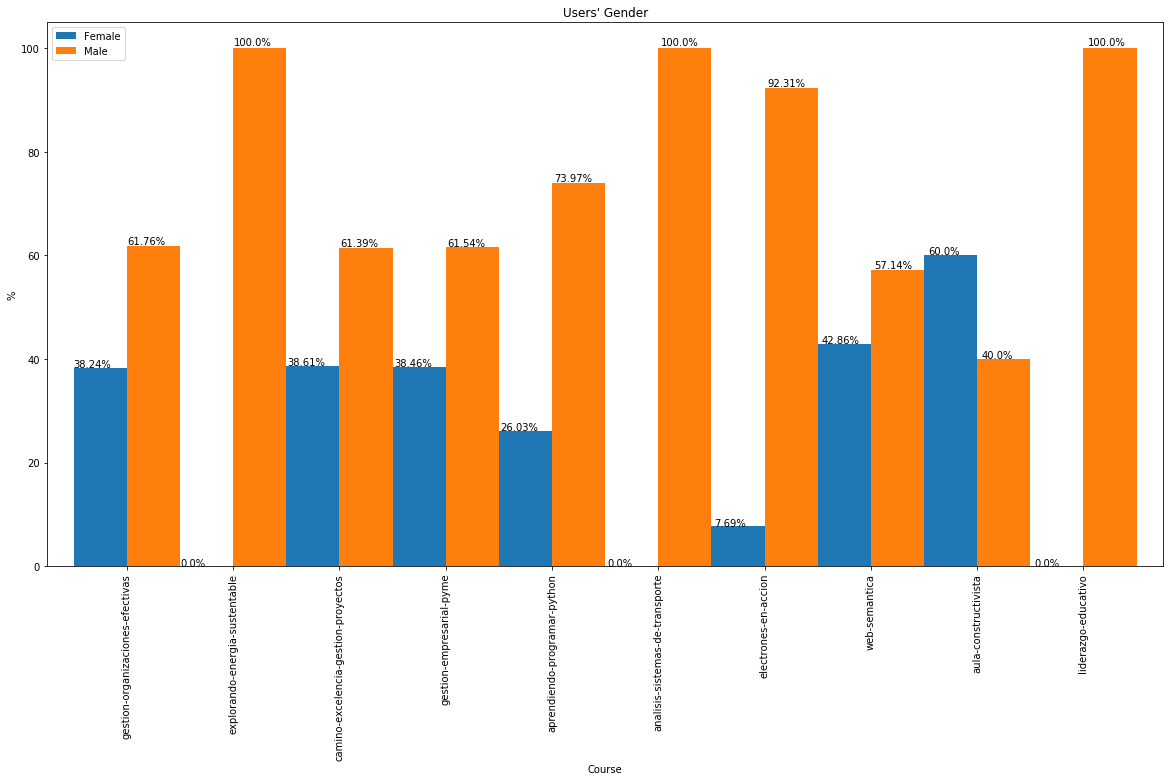

In [8]:
ax = df.T.plot(kind='bar', figsize=(20,10), title="Users' Gender", width=1)
ax.set_xlabel("Course")
ax.set_ylabel("%")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Educational Level

In [9]:
df_edited = []
for j in df_users:
    df_edited.append((df_users[j].level_education.value_counts(normalize=True) * 100).rename(j))

In [10]:
df = ((pd.concat(df_edited, axis=1, sort=True))).round(0)

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})
df

,gestion-organizaciones-efectivas,explorando-energia-sustentable,camino-excelencia-gestion-proyectos,gestion-empresarial-pyme,aprendiendo-programar-python,analisis-sistemas-de-transporte,electrones-en-accion,web-semantica,aula-constructivista,liderazgo-educativo
Not Mentioned,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
bachelor,50.0,50.0,52.0,50.0,51.0,0.0,85.0,57.0,53.0,100.0
doctoral,0.0,50.0,3.0,2.0,7.0,0.0,0.0,14.0,0.0,0.0
master,47.0,0.0,36.0,30.0,30.0,0.0,15.0,29.0,40.0,0.0
primary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
secondary,3.0,0.0,7.0,16.0,7.0,100.0,0.0,0.0,7.0,0.0


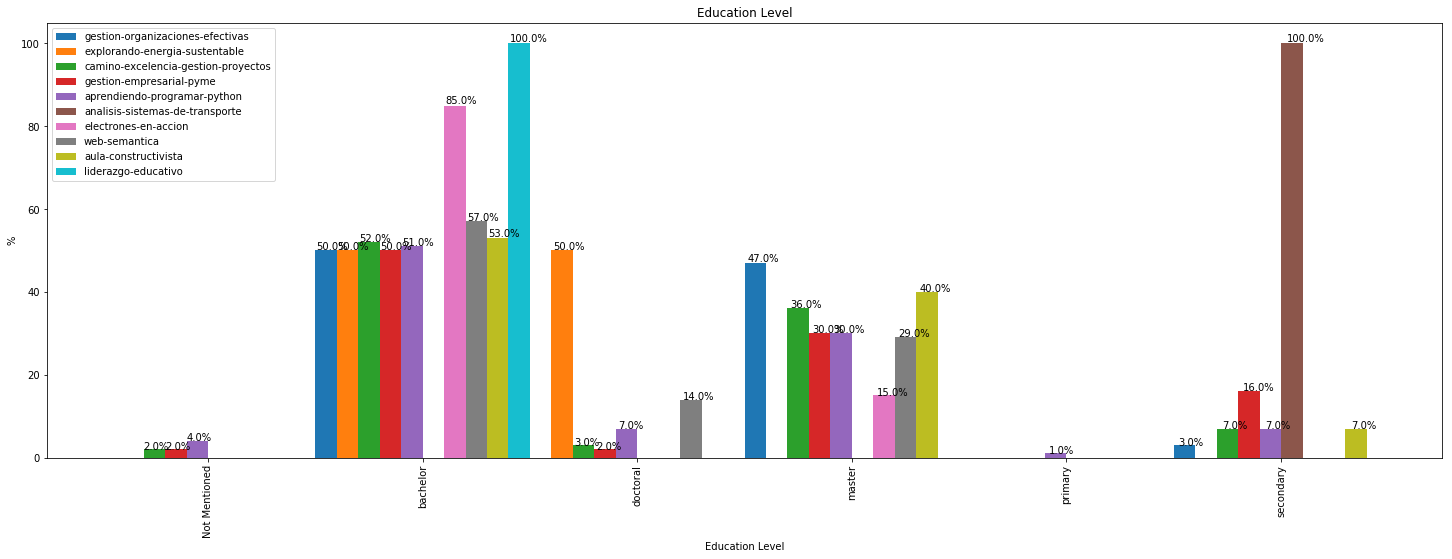

In [11]:
ax = df.plot(kind='bar', figsize=(25,8), title="Education Level", width=1)
ax.set_xlabel("Education Level")
ax.set_ylabel("%")

# # Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [12]:
df.T

,Not Mentioned,bachelor,doctoral,master,primary,secondary
gestion-organizaciones-efectivas,0.0,50.0,0.0,47.0,0.0,3.0
explorando-energia-sustentable,0.0,50.0,50.0,0.0,0.0,0.0
camino-excelencia-gestion-proyectos,2.0,52.0,3.0,36.0,0.0,7.0
gestion-empresarial-pyme,2.0,50.0,2.0,30.0,0.0,16.0
aprendiendo-programar-python,4.0,51.0,7.0,30.0,1.0,7.0
analisis-sistemas-de-transporte,0.0,0.0,0.0,0.0,0.0,100.0
electrones-en-accion,0.0,85.0,0.0,15.0,0.0,0.0
web-semantica,0.0,57.0,14.0,29.0,0.0,0.0
aula-constructivista,0.0,53.0,0.0,40.0,0.0,7.0
liderazgo-educativo,0.0,100.0,0.0,0.0,0.0,0.0


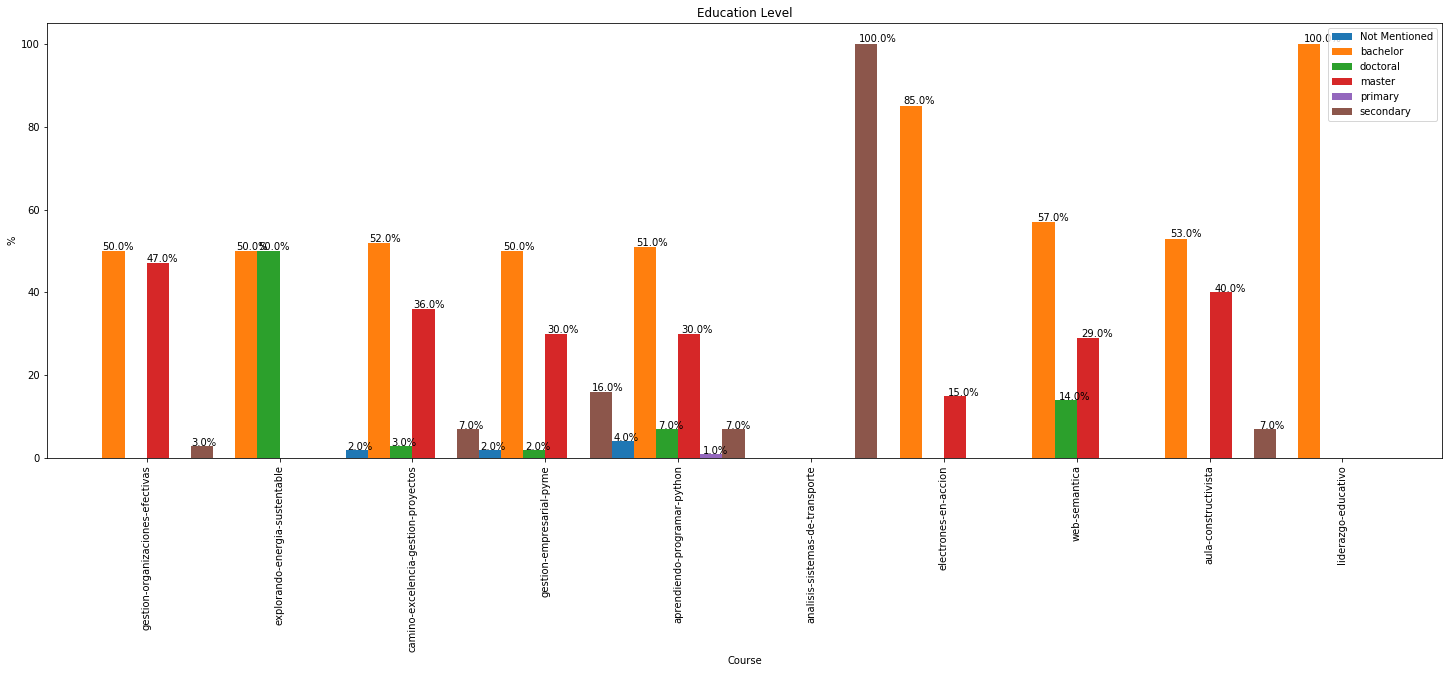

In [13]:
ax = df.T.plot(kind='bar', figsize=(25,8), title="Education Level", width=1, align='center')
ax.set_xlabel("Course")
ax.set_ylabel("%")

# # Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Country

In [14]:
df_edited = []
for j in df_users:
    df_edited.append((df_users[j].country.value_counts(normalize=True) * 100).rename(j))

In [15]:
df = ((pd.concat(df_edited, axis=1, sort=True))).round(1)

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'aprendiendo-programar-python': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})

Text(0, 0.5, '%')

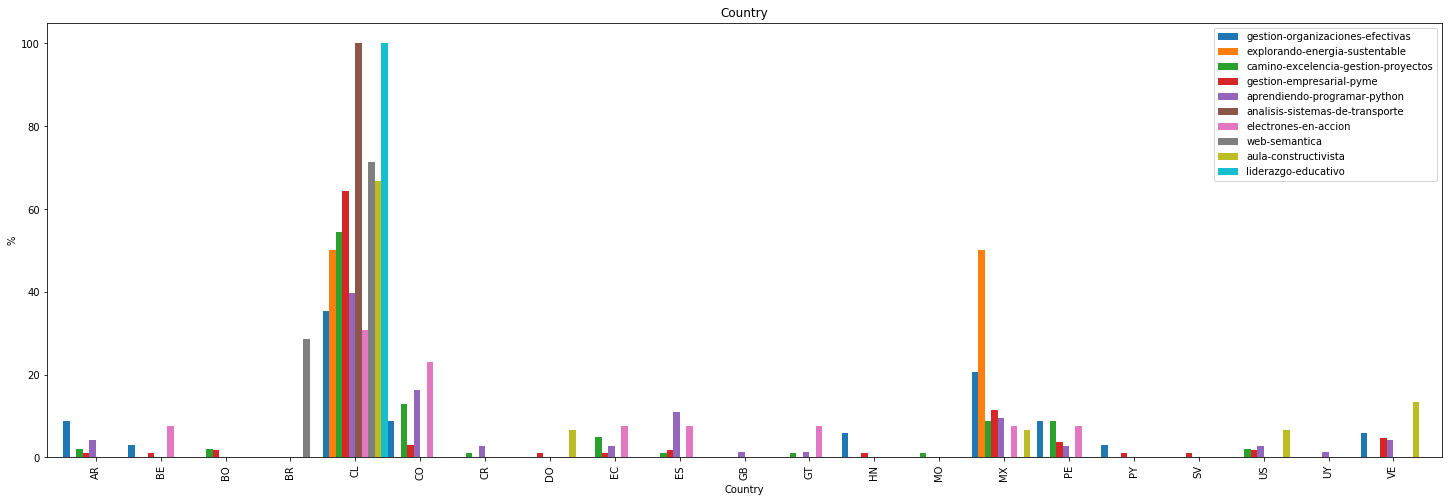

In [16]:
ax = df.plot(kind='bar', figsize=(25,8), title="Country", width=1)
ax.set_xlabel("Country")
ax.set_ylabel("%")



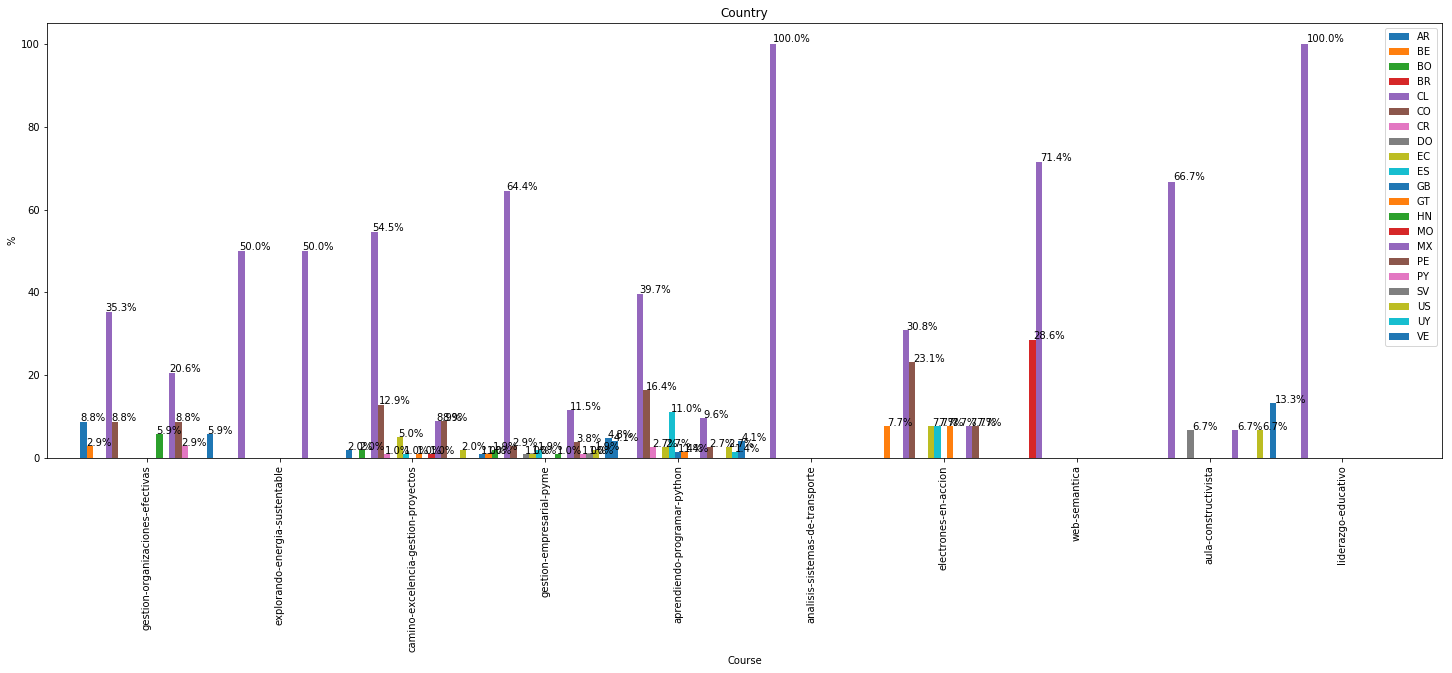

In [17]:
ax = df.T.plot(kind='bar', figsize=(25,8), title="Country", width=1, align='center')
ax.set_xlabel("Course")
ax.set_ylabel("%")

# # Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Users with Notes

In [18]:
info = {}
for i in df_notes:
    info[i] = (len(df_notes[i]) / len(df_users[i])) * 100, ((len(df_users[i]) - len(df_notes[i])) / len(df_users[i])) * 100

In [19]:
df = pd.DataFrame(info, index=['With Notes', 'Whithout Notes']).round(2) 
df

,gestion-organizaciones-efectivas,explorando-energia-sustentable,camino-excelencia-gestion-proyectos,gestion-empresarial-pyme,aprendiendo-programar-python,analisis-sistemas-de-transporte,electrones-en-accion,web-semantica,aula-constructivista,liderazgo-educativo
With Notes,38.24,50.0,38.61,28.85,45.21,100.0,30.77,71.43,60.0,100.0
Whithout Notes,61.76,50.0,61.39,71.15,54.79,0.0,69.23,28.57,40.0,0.0


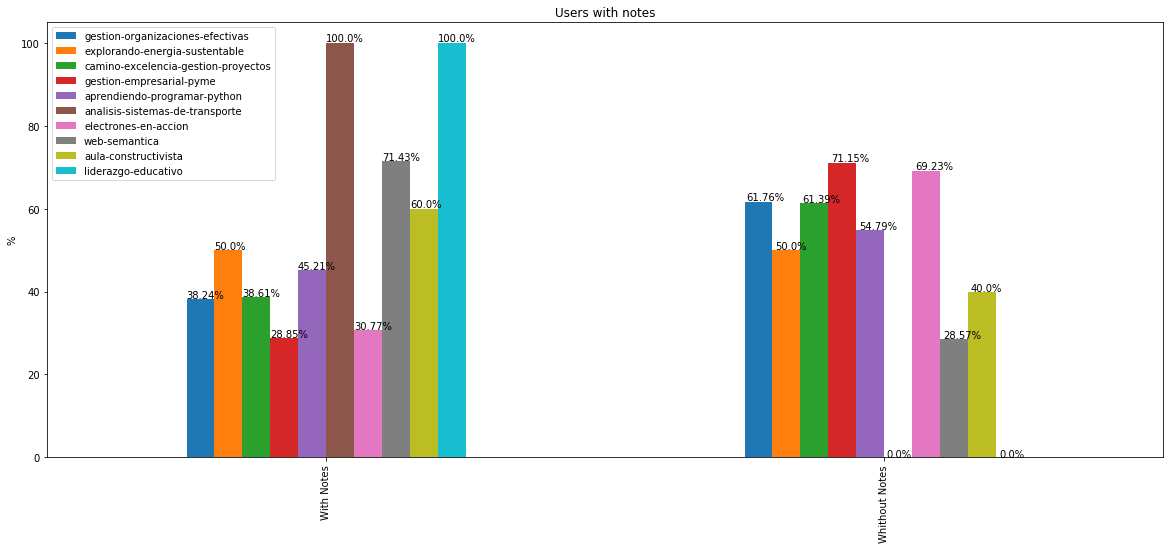

In [20]:
ax = df.plot(kind='bar', figsize=(20,8), title="Users with notes")
ax.set_ylabel("%")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

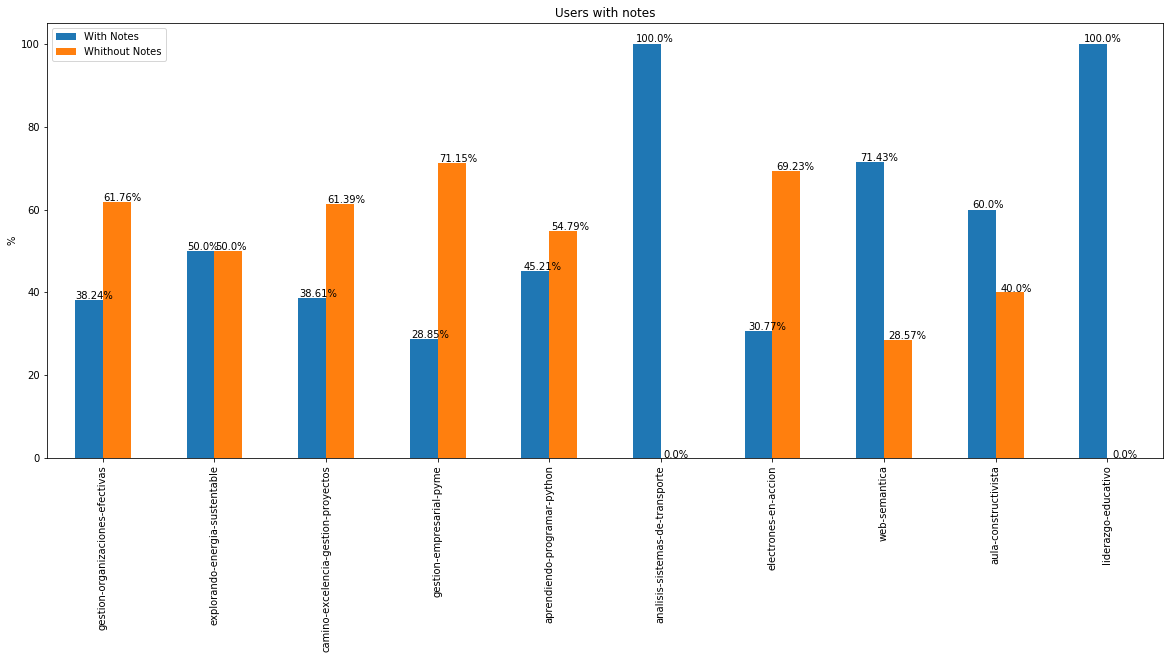

In [21]:
ax = df.T.plot(kind='bar', figsize=(20,8), title="Users with notes")
ax.set_ylabel("%")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Users with Goals

In [22]:
info = {}
for i in df_goals_users:
    info[i] = (len(df_goals_users[i]) / len(df_users[i])) * 100, ((len(df_users[i]) - len(df_goals_users[i])) / len(df_users[i])) * 100

In [23]:
df = pd.DataFrame(info, index=['With Goals', 'Whithout Goals']).round(2) 
df

,gestion-organizaciones-efectivas,explorando-energia-sustentable,camino-excelencia-gestion-proyectos,gestion-empresarial-pyme,aprendiendo-programar-python,analisis-sistemas-de-transporte,electrones-en-accion,web-semantica,aula-constructivista,liderazgo-educativo
With Goals,8.82,0.0,5.94,10.58,5.48,0.0,7.69,42.86,20.0,0.0
Whithout Goals,91.18,100.0,94.06,89.42,94.52,100.0,92.31,57.14,80.0,100.0


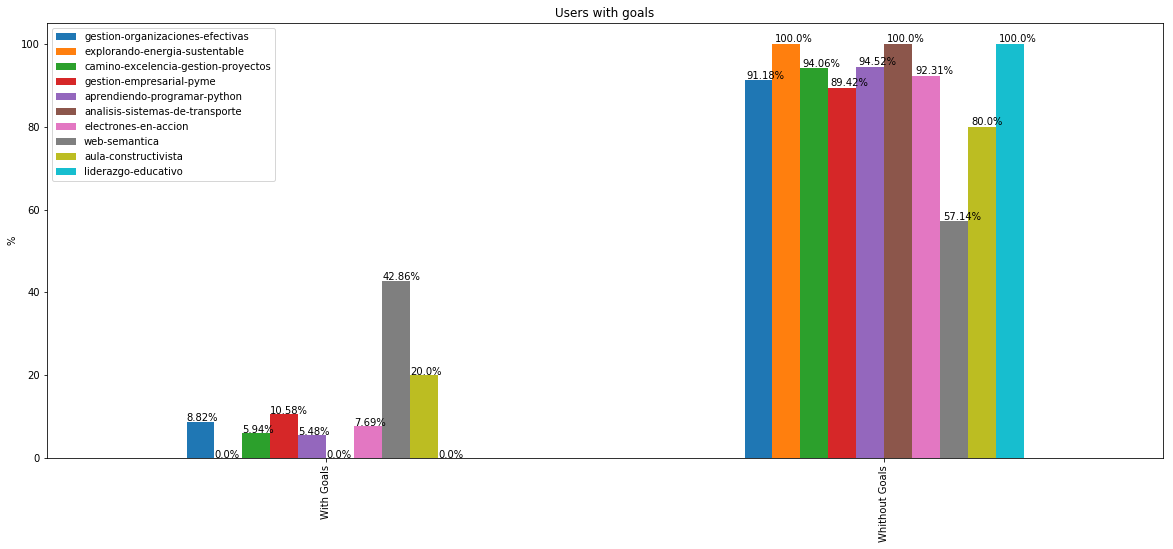

In [24]:
ax = df.plot(kind='bar', figsize=(20,8), title="Users with goals")
ax.set_ylabel("%")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

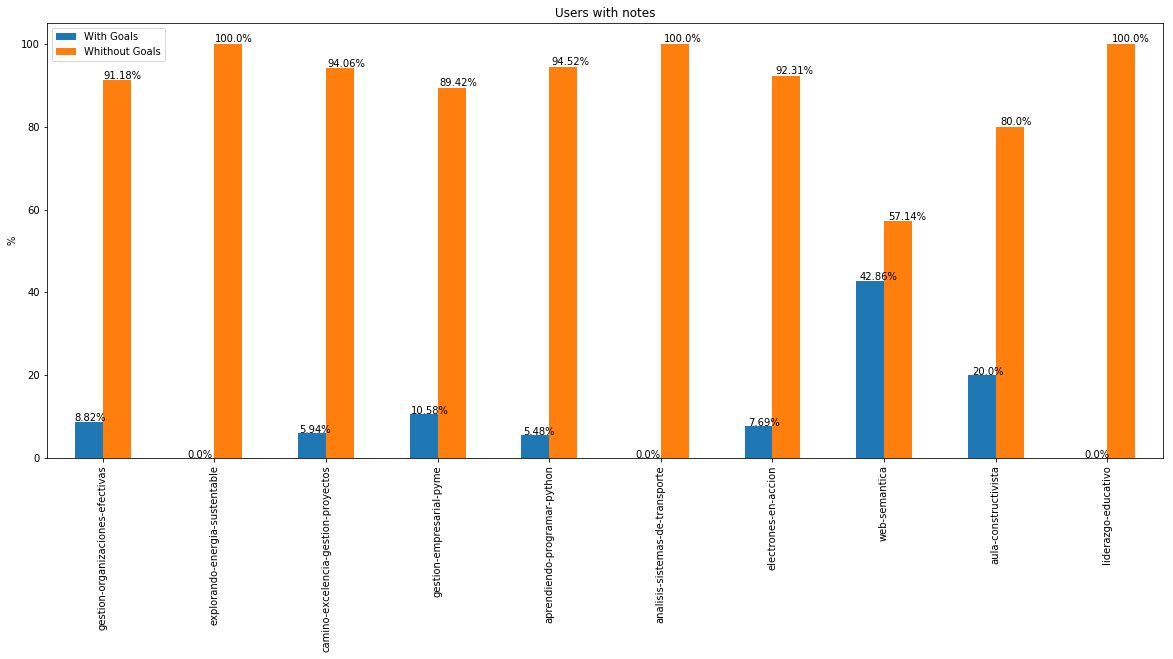

In [25]:
ax = df.T.plot(kind='bar', figsize=(20,8), title="Users with notes")
ax.set_ylabel("%")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Goals Frequencies

In [26]:
info = {}
for i in df_goals_users:
    info[i] = (df_goals_users[i].number_goals.value_counts(normalize=True) * 100)

In [27]:
df = pd.DataFrame(info).round(2) 

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'aprendiendo-programar-python': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})

df

,gestion-organizaciones-efectivas,explorando-energia-sustentable,camino-excelencia-gestion-proyectos,gestion-empresarial-pyme,aprendiendo-programar-python,analisis-sistemas-de-transporte,electrones-en-accion,web-semantica,aula-constructivista,liderazgo-educativo
1,100.0,0.0,83.33,100.0,50.0,0.0,0.0,33.33,33.33,0.0
2,0.0,0.0,16.67,0.0,50.0,0.0,100.0,66.67,0.00,0.0
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,33.33,0.0
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,33.33,0.0


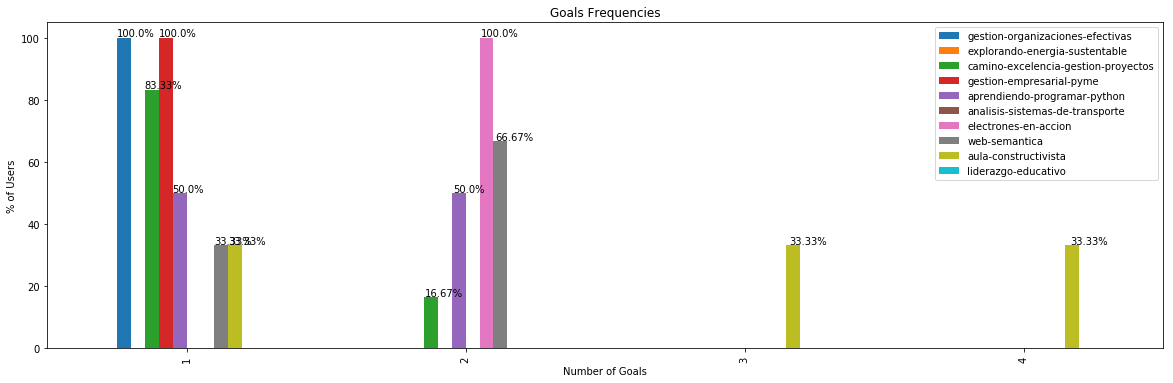

In [28]:
ax = df.plot(kind='bar', figsize=(20,6), title="Goals Frequencies")
ax.set_xlabel("Number of Goals")
ax.set_ylabel("% of Users")

# Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

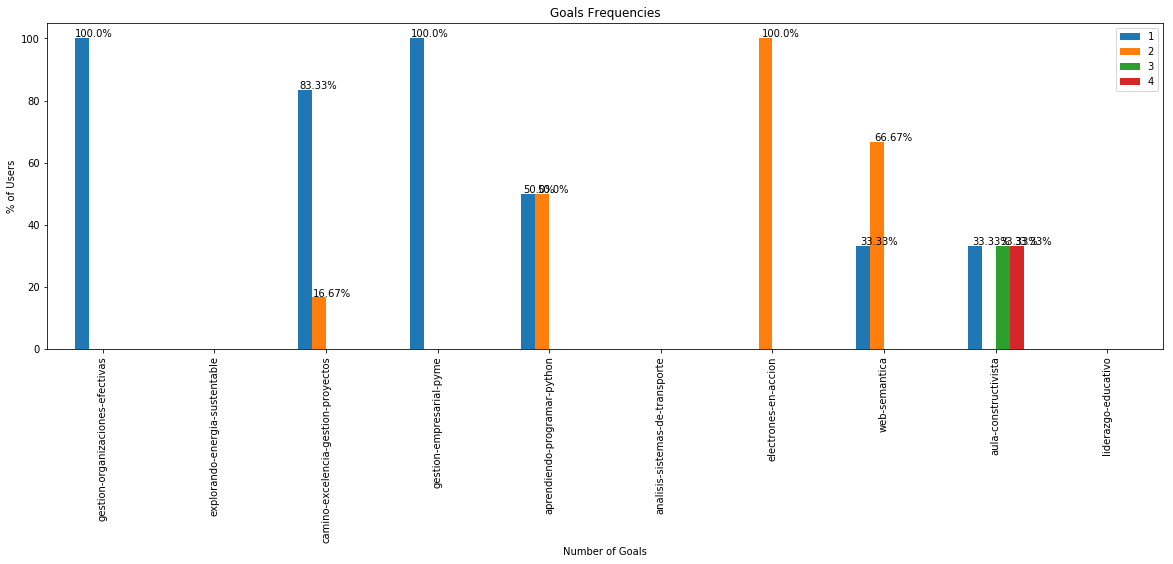

In [29]:
ax = df.T.plot(kind='bar', figsize=(20,6), title="Goals Frequencies")
ax.set_xlabel("Number of Goals")
ax.set_ylabel("% of Users")

# Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Average Goal by User

In [30]:
info = {}
for i in df_goals_users:
    info[i] = df_goals_users[i].mean().sort_values(ascending=False)

In [31]:
df = pd.DataFrame(info).round(2) 

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'aprendiendo-programar-python': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})

df

,gestion-organizaciones-efectivas,explorando-energia-sustentable,camino-excelencia-gestion-proyectos,gestion-empresarial-pyme,aprendiendo-programar-python,analisis-sistemas-de-transporte,electrones-en-accion,web-semantica,aula-constructivista,liderazgo-educativo
average_goal_evaluations,1.33,0.0,1.00,2.00,2.25,0.0,3.0,1.83,1.97,0.0
average_goal_hours,1.67,0.0,3.00,4.55,2.75,0.0,5.5,2.33,3.06,0.0
average_goal_videos,2.00,0.0,2.83,3.18,5.38,0.0,6.5,2.67,5.33,0.0
number_goals,1.00,0.0,1.17,1.00,1.50,0.0,2.0,1.67,2.67,0.0


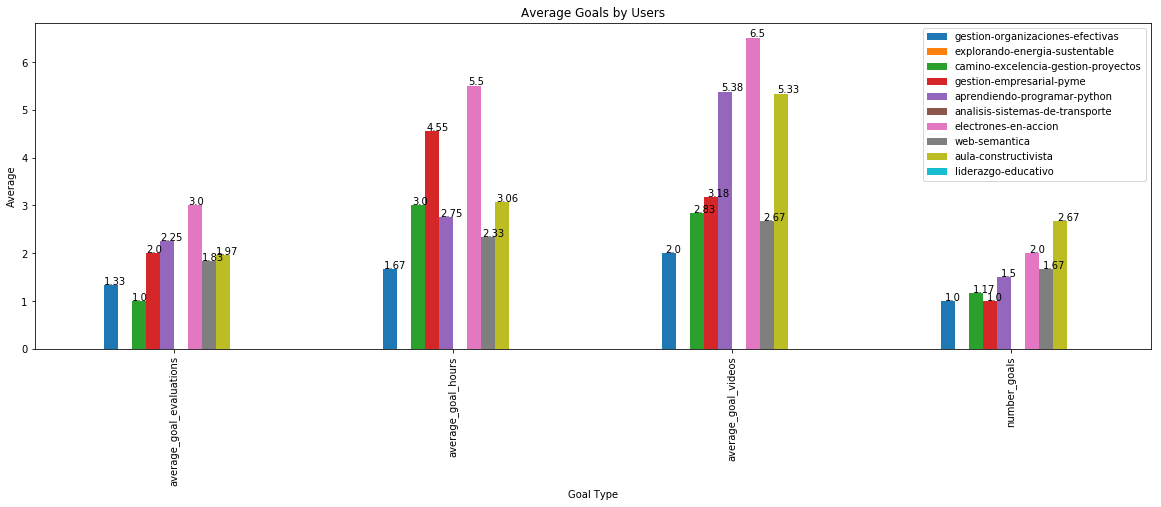

In [32]:
ax = df.plot(kind='bar', figsize=(20,6), title="Average Goals by Users")
ax.set_xlabel("Goal Type")
ax.set_ylabel("Average")

# Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Users with Interactions

In [33]:
info = {}
for i in df_goals_users:
    info[i] = (len(df_interactions[i]) / len(df_users[i])) * 100, ((len(df_users[i]) - len(df_interactions[i])) / len(df_users[i])) * 100

In [34]:
df = pd.DataFrame(info, index=['With Interactions', 'Whithout Interactions']).round(2) 
df

,gestion-organizaciones-efectivas,explorando-energia-sustentable,camino-excelencia-gestion-proyectos,gestion-empresarial-pyme,aprendiendo-programar-python,analisis-sistemas-de-transporte,electrones-en-accion,web-semantica,aula-constructivista,liderazgo-educativo
With Interactions,67.65,100.0,71.29,61.54,63.01,100.0,61.54,85.71,73.33,0.0
Whithout Interactions,32.35,0.0,28.71,38.46,36.99,0.0,38.46,14.29,26.67,100.0


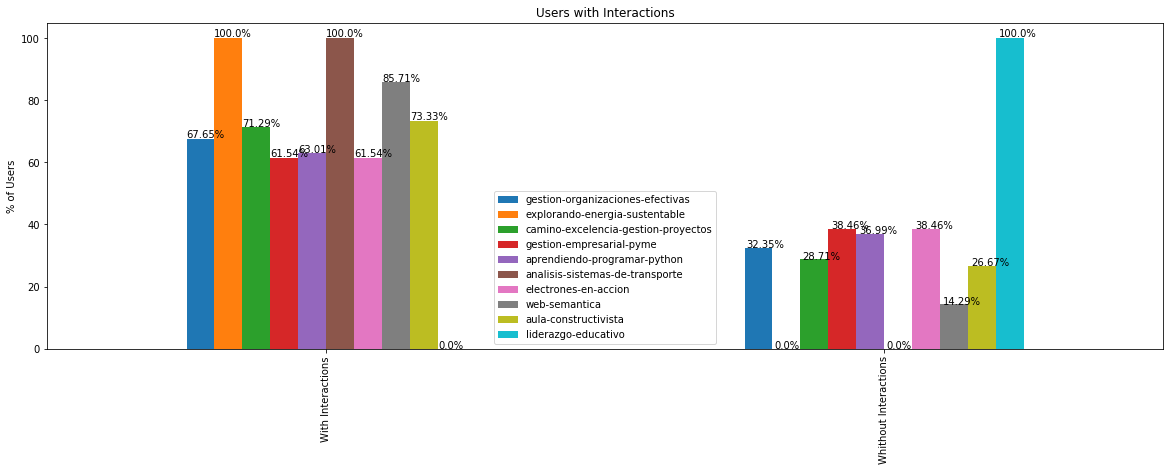

In [35]:
ax = df.plot(kind='bar', figsize=(20,6), title="Users with Interactions")
ax.set_ylabel("% of Users")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Type

In [36]:
info = {}
for i in df_types:
    info[i] = (((df_types[i].loc['All']) / df_types[i].loc['All'].sum()) * 100).sort_values(ascending=False)

In [37]:
df = pd.concat(info, axis=1, sort=False).round(2)

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'aprendiendo-programar-python': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})

df

,analisis-sistemas-de-transporte,aprendiendo-programar-python,aula-constructivista,camino-excelencia-gestion-proyectos,electrones-en-accion,explorando-energia-sustentable,gestion-empresarial-pyme,gestion-organizaciones-efectivas,web-semantica
Graph,75.00,35.71,50.00,29.98,51.85,0.00,36.57,35.52,63.79
Button,16.18,14.80,18.18,28.12,15.56,7.69,16.45,23.53,11.21
Menu,8.82,49.49,31.82,41.90,32.59,92.31,46.98,40.95,25.00


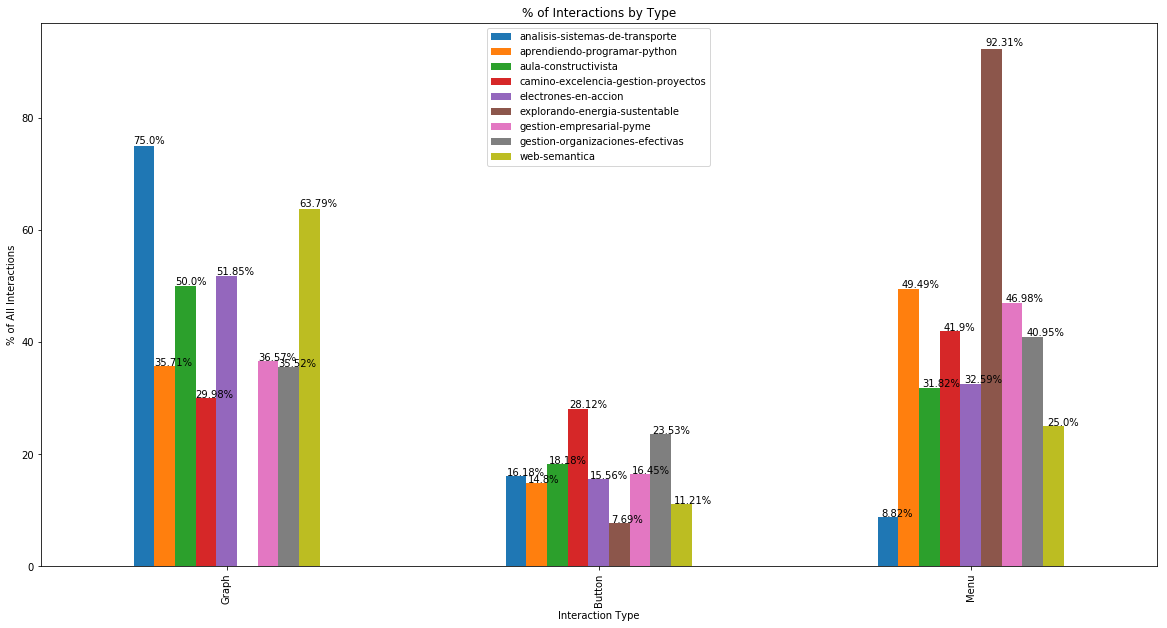

In [38]:
ax = df.plot(kind='bar', figsize=(20,10), title="% of Interactions by Type")
ax.set_ylabel("% of All Interactions")
ax.set_xlabel("Interaction Type")

# Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

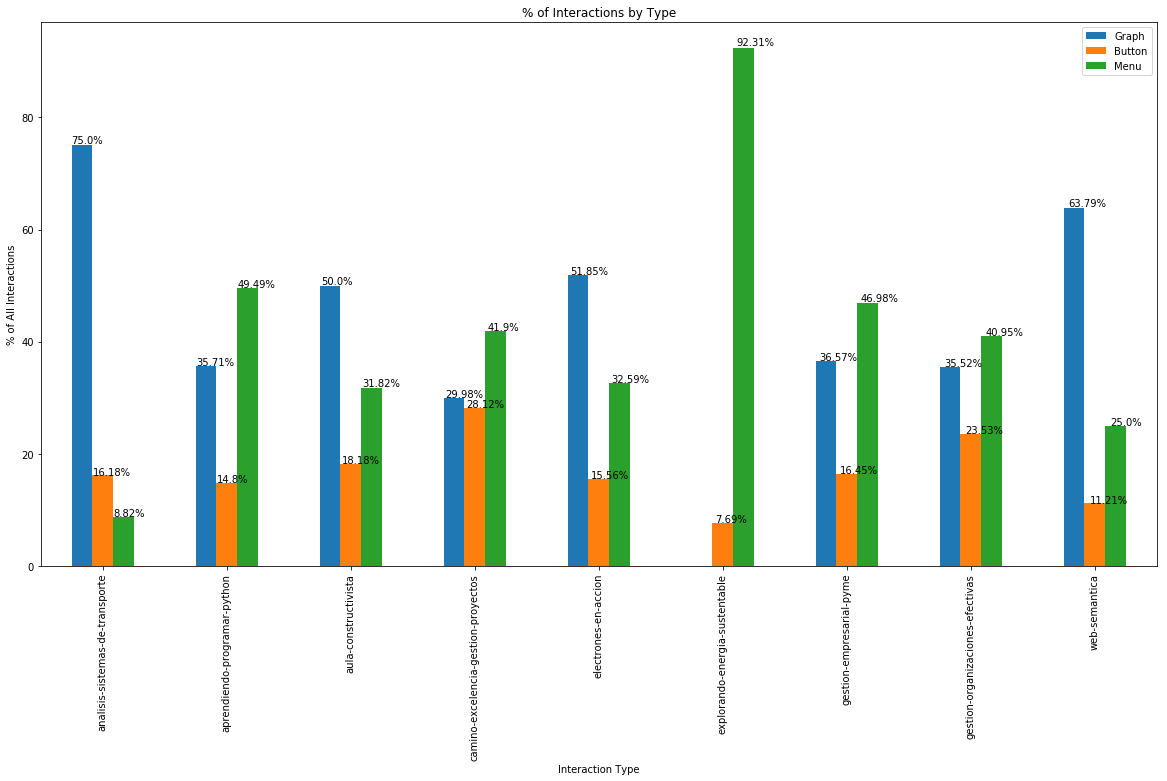

In [39]:
ax = df.T.plot(kind='bar', figsize=(20,10), title="% of Interactions by Type")
ax.set_ylabel("% of All Interactions")
ax.set_xlabel("Interaction Type")

# Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

### Mean User Interactions by Graph Type

In [40]:
info = {}
for i in df_graphs:
    info[i] = df_graphs[i].mean()

In [41]:
df = pd.concat(info, axis=1, sort=False).round(2)

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'aprendiendo-programar-python': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})

df

,analisis-sistemas-de-transporte,aprendiendo-programar-python,aula-constructivista,camino-excelencia-gestion-proyectos,electrones-en-accion,explorando-energia-sustentable,gestion-empresarial-pyme,gestion-organizaciones-efectivas,web-semantica
Graph_EngagementByTypeActivities,41.0,3.02,15.45,4.62,6.75,0.0,3.47,4.17,9.50
Graph_TimeUseOnCourse,10.0,1.50,0.55,0.72,2.00,0.0,1.34,0.43,2.83
Graph_TimeInSessions,0.0,0.04,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Graph_EngagementByNumberActivities,0.0,0.00,0.00,0.00,0.00,0.0,0.02,0.48,0.00
Graph_EffectivenessActivityType,0.0,0.00,0.00,0.00,0.00,0.0,0.00,1.48,0.00
Graph_EffectivenessByDayWeek,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.17,0.00
Graph_TimeUse,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.09,0.00


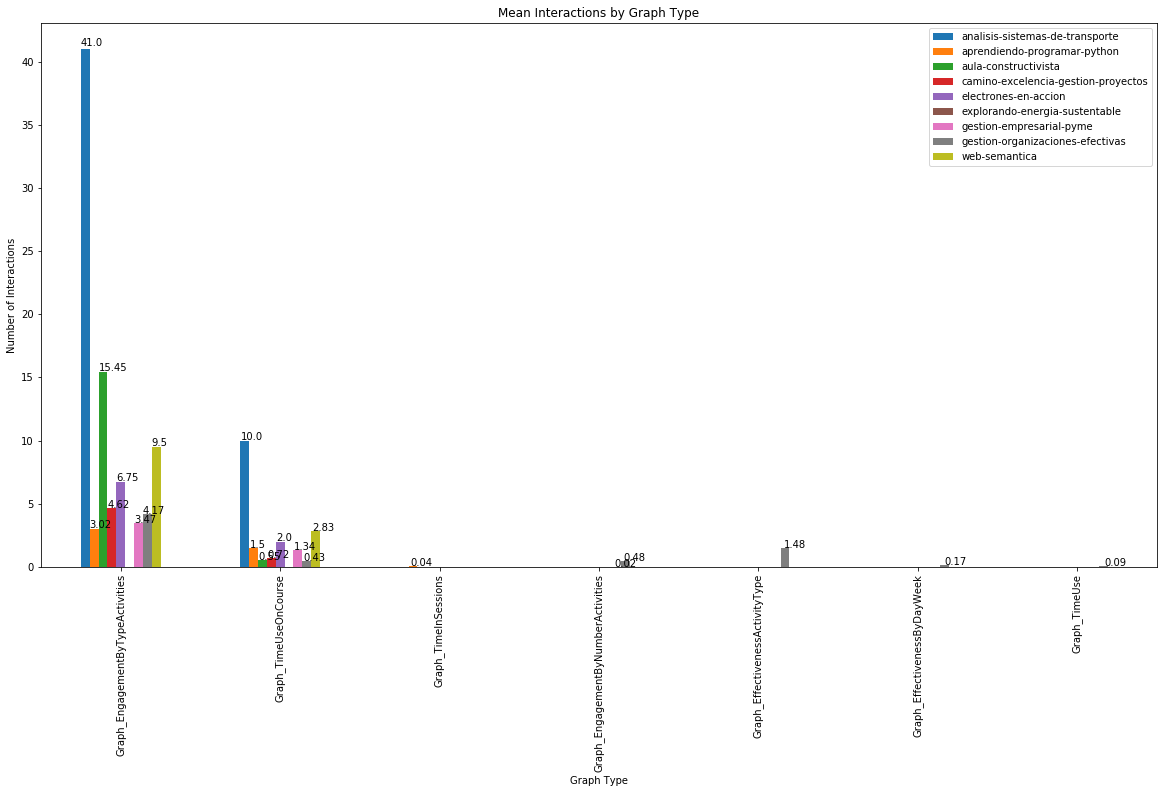

In [42]:
ax = df.plot(kind='bar', figsize=(20,10), title="Mean Interactions by Graph Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Graph Type")

# Adding labels to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Mean User Interactions by Button Type

In [43]:
info = {}
for i in df_buttons:
    info[i] = df_buttons[i].mean()

In [44]:
df = pd.concat(info, axis=1, sort=False).round(2)

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'aprendiendo-programar-python': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})

df

,analisis-sistemas-de-transporte,aprendiendo-programar-python,aula-constructivista,camino-excelencia-gestion-proyectos,electrones-en-accion,explorando-energia-sustentable,gestion-empresarial-pyme,gestion-organizaciones-efectivas,web-semantica
Button_ComparisonDisabled,3.0,0.02,0.36,0.12,0.12,0.0,0.06,0.09,0.00
Button_ComparisonEnabled,5.0,0.11,0.64,0.44,0.12,0.0,0.22,0.35,0.17
Button_FilterTime30Days,1.0,0.04,0.18,0.33,0.25,0.0,0.05,0.09,0.17
Button_FilterTime7Days,1.0,0.09,0.36,0.44,0.38,0.0,0.17,0.26,0.17
Button_FilterTimeViewAll,1.0,0.09,0.09,0.42,0.50,0.0,0.09,0.13,0.17
Button_DefineGoal,0.0,0.15,0.82,0.15,0.12,0.0,0.28,0.39,0.83
Button_DownloadAllNotes,0.0,0.22,0.27,0.40,0.12,0.0,0.31,0.17,0.50
Button_EditNote,0.0,0.28,0.73,0.65,0.00,0.0,0.12,0.22,0.17
Button_Effectiveness,0.0,0.30,0.82,0.58,0.50,0.0,0.45,0.48,0.00
Button_EngagementPerformance,0.0,0.13,0.55,0.14,0.00,0.0,0.09,0.30,0.00


Text(0.5, 0, 'Button Type')

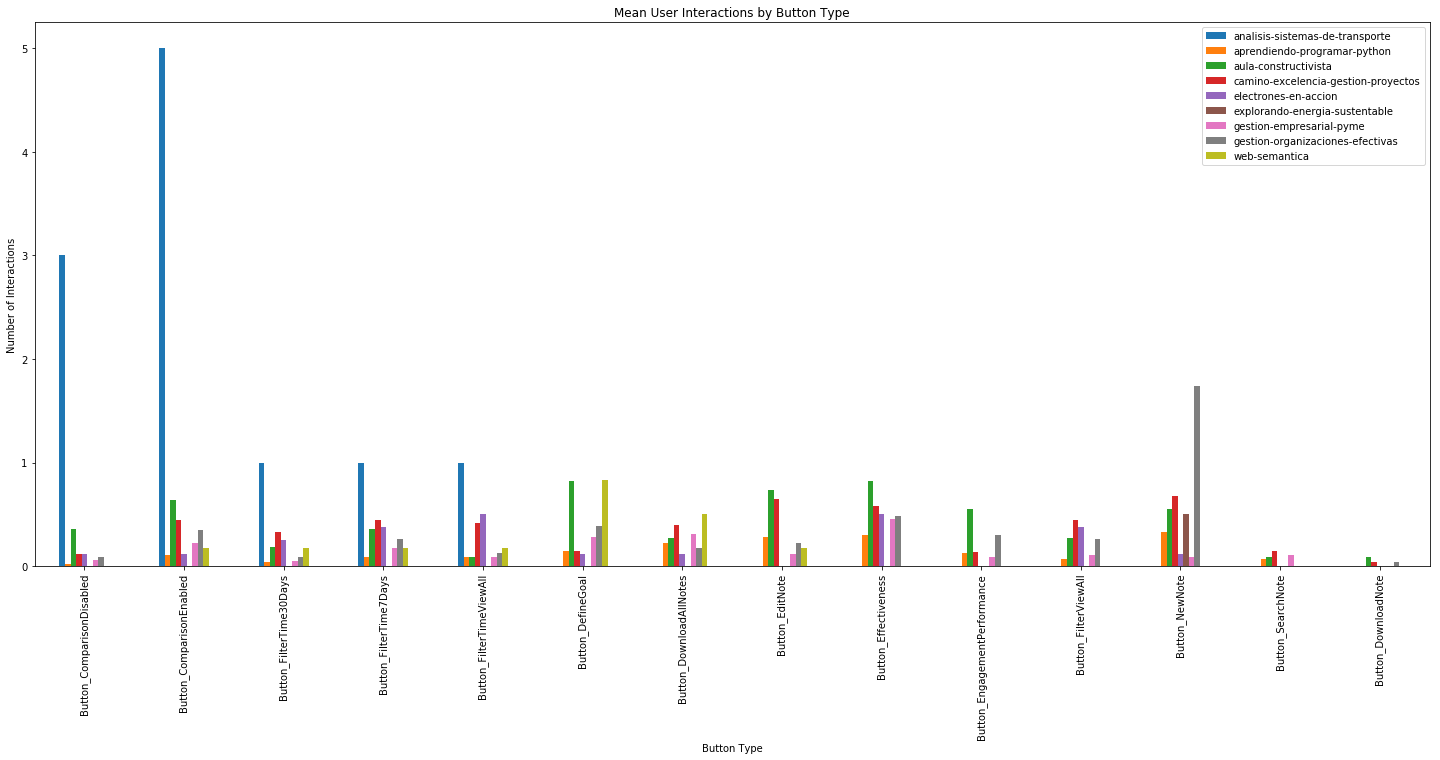

In [45]:
ax = df.plot(kind='bar', figsize=(25,10), title="Mean User Interactions by Button Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Button Type")


### Mean User Interactions by Menu Type

In [46]:
info = {}
for i in df_menus:
    info[i] = df_menus[i].mean()

In [47]:
df = pd.concat(info, axis=1, sort=False).round(2)

# Filling NaN Values
df = df.fillna({'explorando-energia-sustentable': 0, 
                'analisis-sistemas-de-transporte': 0,
                'liderazgo-educativo': 0,
                'gestion-organizaciones-efectivas': 0,
                'camino-excelencia-gestion-proyectos': 0,
                'aprendiendo-programar-python': 0,
                'gestion-empresarial-pyme': 0,
                'electrones-en-accion': 0,
                'web-semantica': 0,
                'aula-constructivista': 0})

df

,analisis-sistemas-de-transporte,aprendiendo-programar-python,aula-constructivista,camino-excelencia-gestion-proyectos,electrones-en-accion,explorando-energia-sustentable,gestion-empresarial-pyme,gestion-organizaciones-efectivas,web-semantica
Menu_ChooseCourse,4.0,3.33,4.36,3.43,2.25,2.0,3.33,3.43,1.83
Menu_GoalSetting,1.0,1.28,2.91,1.62,1.50,1.0,1.25,1.65,1.67
Menu_ViewNotes,1.0,1.72,2.91,2.42,1.75,3.0,1.62,2.78,1.33


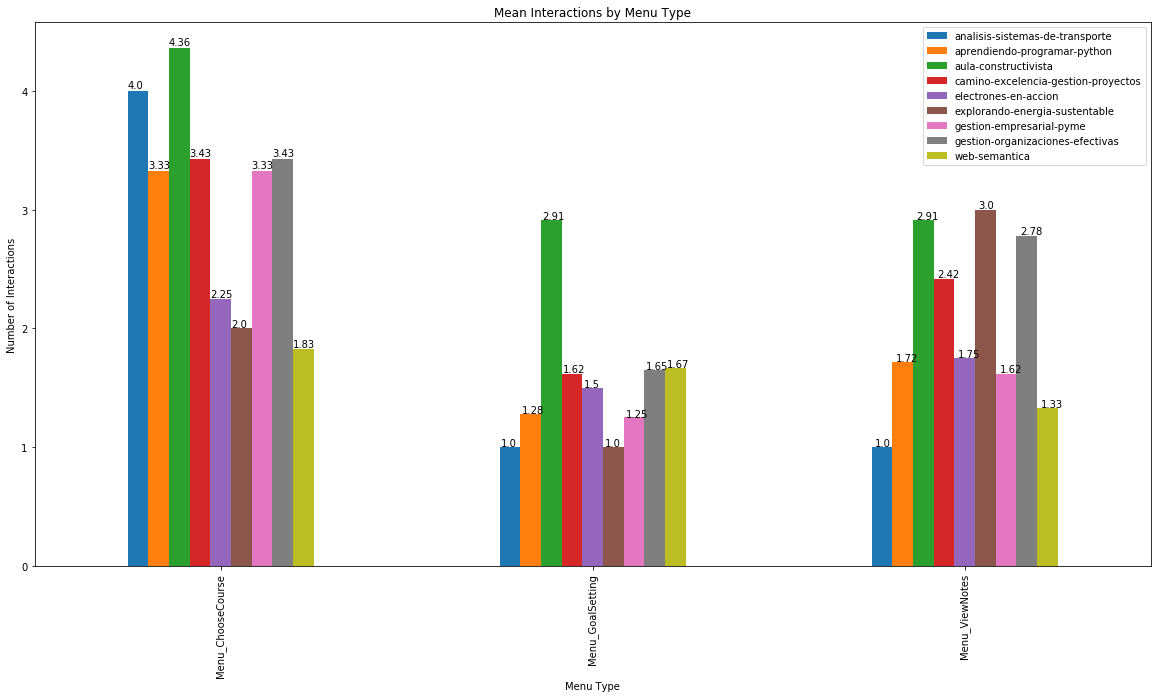

In [48]:
ax = df.plot(kind='bar', figsize=(20,10), title="Mean Interactions by Menu Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Menu Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))